In [1]:
###Importing all neccessary libraries
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
###Load the dataset
data = pd.read_csv("kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.shape

(400, 26)

In [4]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
data['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imputer = pd.DataFrame(mode.fit_transform(data))
data_imputer.columns = data.columns
data_imputer

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
data_imputer.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [11]:
set(data_imputer['age'].tolist())

{2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 11.0,
 12.0,
 14.0,
 15.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 90.0}

In [12]:
for i in data_imputer.columns:
    print("**********",i,"********")
    print()
    print(set(data_imputer[i].tolist()))
    print()



********** id ********

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

In [13]:
###Handling numerical columns
print(data_imputer['pcv'].mode())
print(data_imputer['wc'].mode())
print(data_imputer['rc'].mode())

0    41
Name: pcv, dtype: object
0    9800
Name: wc, dtype: object
0    5.2
Name: rc, dtype: object


In [14]:
###handling categorical columns and numerical columns
data_imputer['classification']=data_imputer['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)
data_imputer['cad']=data_imputer['cad'].apply(lambda x:'no' if x=='\tno' else x)

data_imputer['dm']=data_imputer['dm'].apply(lambda x:'no' if x=='\tno' else x)
data_imputer['dm']=data_imputer['dm'].apply(lambda x:'yes' if x=='\tyes' else x)
data_imputer['dm']=data_imputer['dm'].apply(lambda x:'yes' if x==' yes' else x)

data_imputer['rc']=data_imputer['rc'].apply(lambda x:'5.2' if x=='\tno?' else x)

data_imputer['wc']=data_imputer['wc'].apply(lambda x:'9800' if x=='\t6200' else x)
data_imputer['wc']=data_imputer['wc'].apply(lambda x:'9800' if x=='\t8400' else x)
data_imputer['wc']=data_imputer['wc'].apply(lambda x:'9800' if x=='\t?' else x)

data_imputer['pcv']=data_imputer['pcv'].apply(lambda x:'41' if x=='\t43' else x)
data_imputer['pcv']=data_imputer['pcv'].apply(lambda x:'41' if x=='\t?' else x)


In [15]:
for i in data_imputer.columns:
    print("**********",i,"********")
    print()
    print(set(data_imputer[i].tolist()))
    print()


********** id ********

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

In [16]:
data_imputer['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


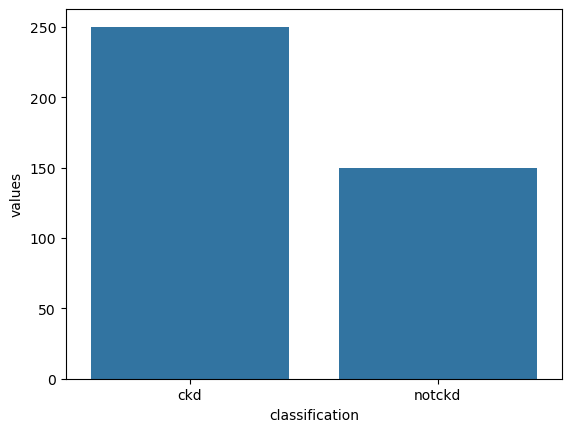

In [17]:
temp = data_imputer['classification'].value_counts()
temp_df = pd.DataFrame({'classification':temp.index, 'values':temp.values})
print(sns.barplot(x='classification', y='values',data=temp_df))

In [18]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [19]:
data_imputer.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [20]:
data.select_dtypes(exclude= ['object']).columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')

In [21]:
for i in data.select_dtypes(exclude= ['object']).columns:
    data_imputer[i] = data_imputer[i].apply(lambda x:float(x))
    

In [22]:
data_imputer.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

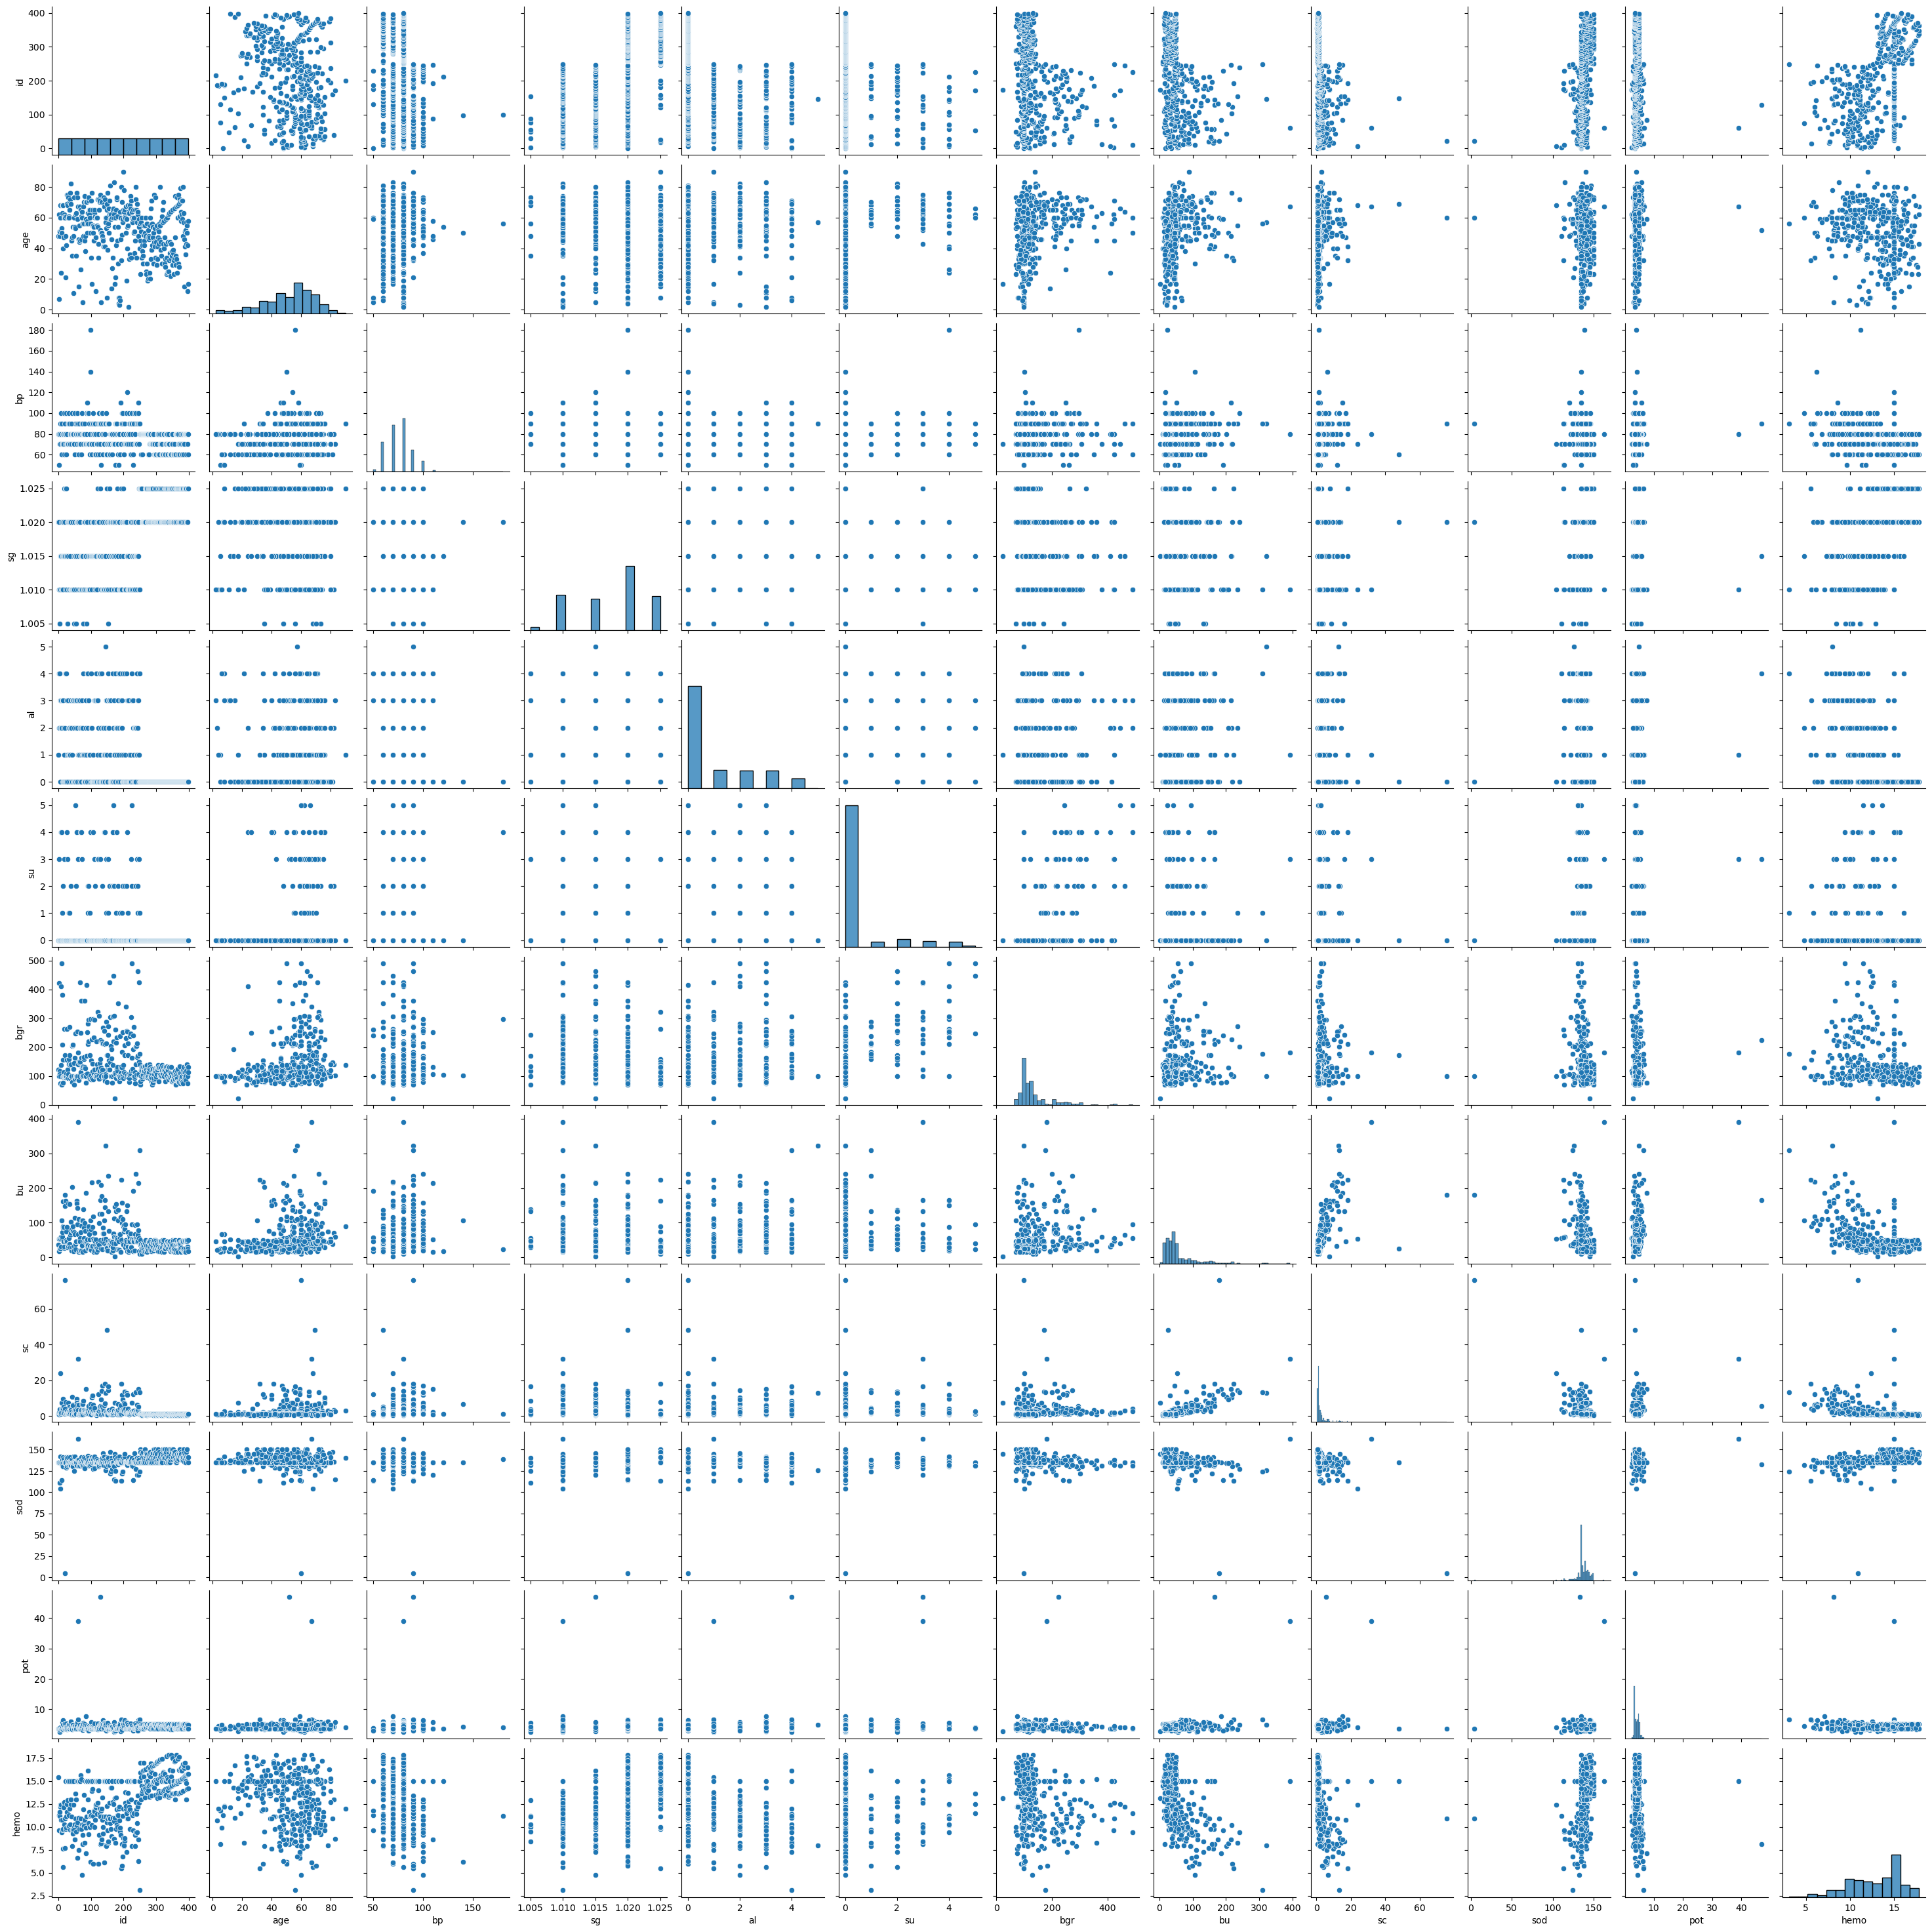

In [23]:
sns.pairplot(data_imputer)

C:\Users\user\AppData\Local\Temp\ipykernel_11480\836910544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


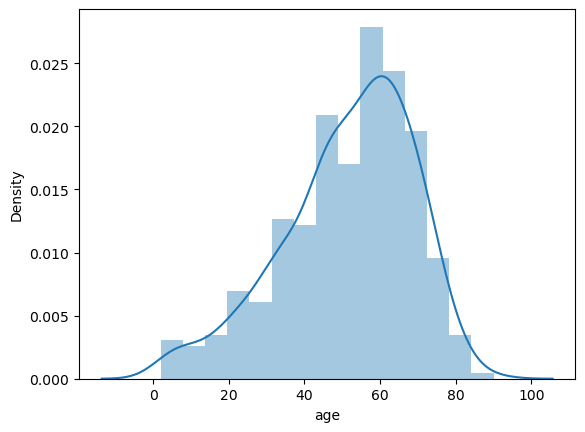

C:\Users\user\AppData\Local\Temp\ipykernel_11480\836910544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


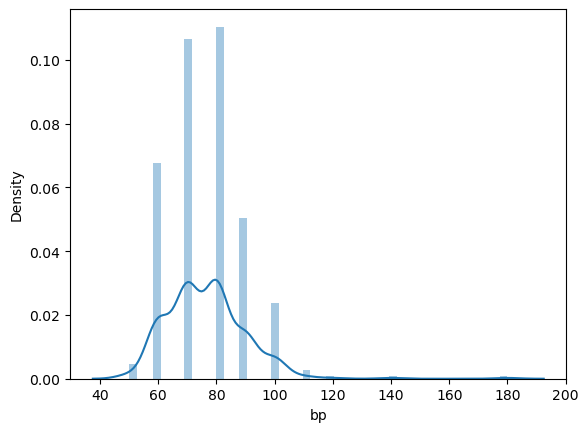

C:\Users\user\AppData\Local\Temp\ipykernel_11480\836910544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


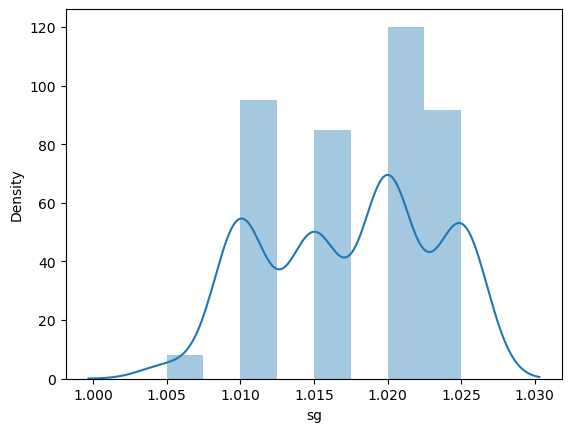

C:\Users\user\AppData\Local\Temp\ipykernel_11480\836910544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


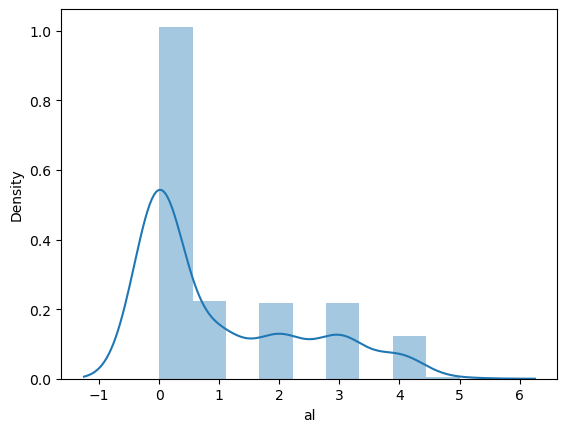

C:\Users\user\AppData\Local\Temp\ipykernel_11480\836910544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


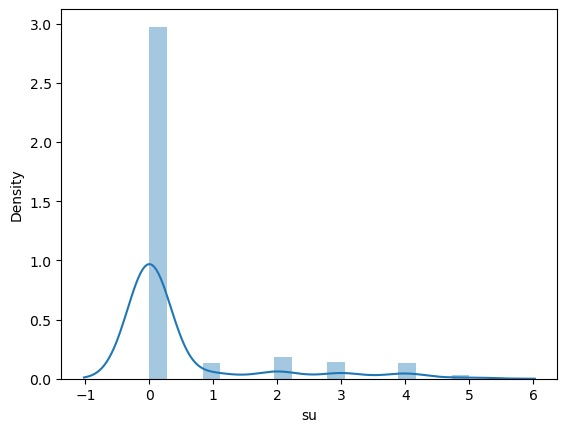

C:\Users\user\AppData\Local\Temp\ipykernel_11480\836910544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


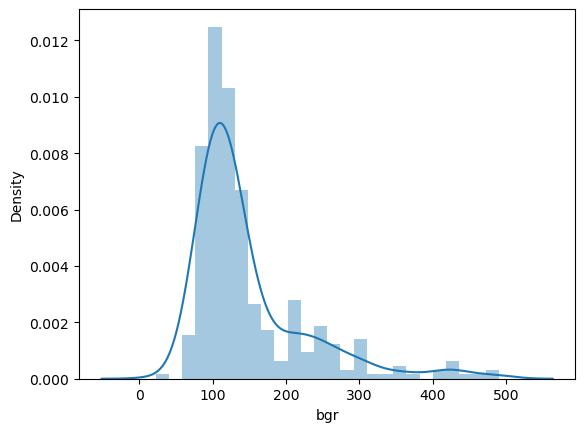

C:\Users\user\AppData\Local\Temp\ipykernel_11480\836910544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


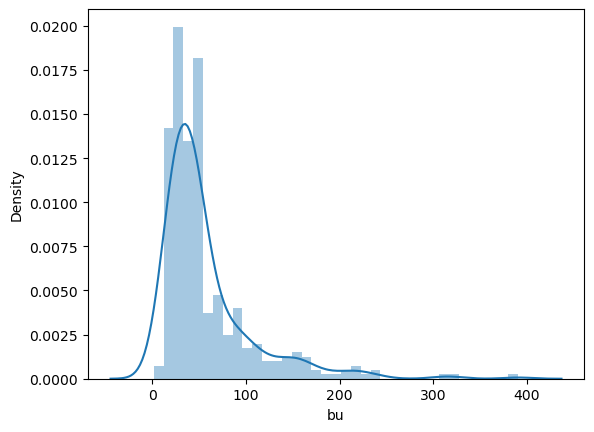

C:\Users\user\AppData\Local\Temp\ipykernel_11480\836910544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


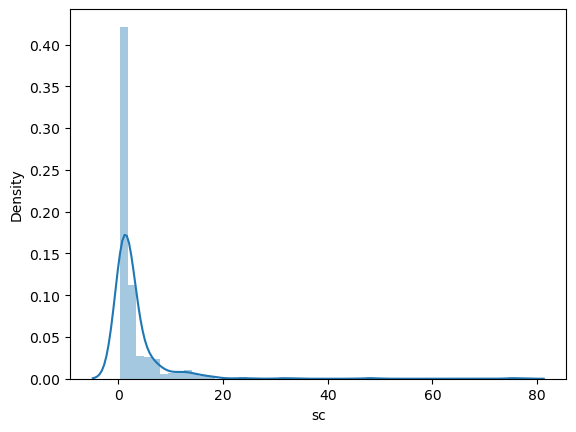

C:\Users\user\AppData\Local\Temp\ipykernel_11480\836910544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


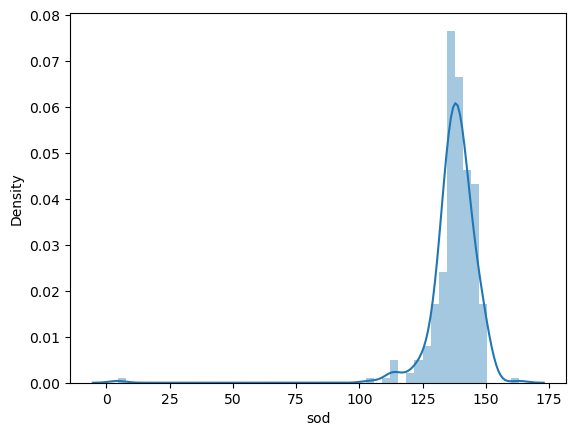

C:\Users\user\AppData\Local\Temp\ipykernel_11480\836910544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


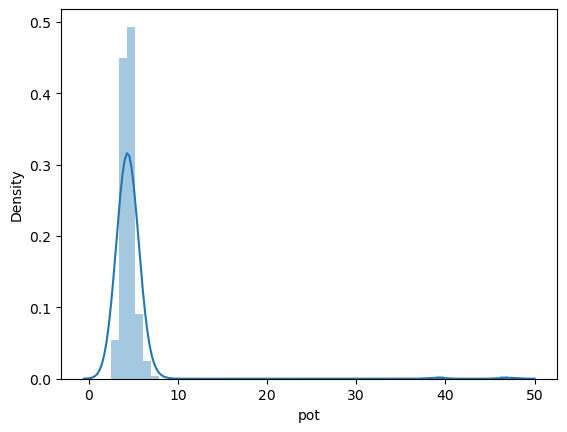

C:\Users\user\AppData\Local\Temp\ipykernel_11480\836910544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


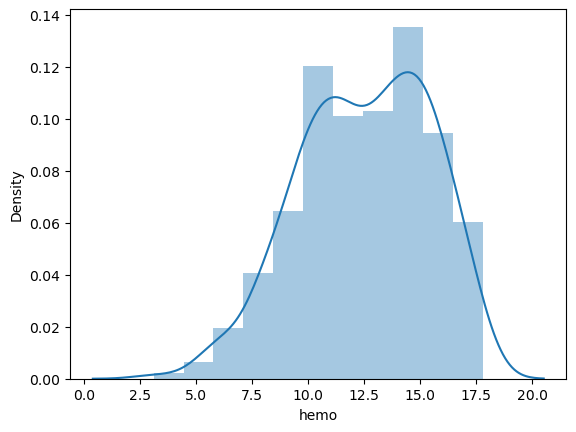

In [24]:
def histplots(col):
    sns.distplot(data[col])
    plt.show()

for i in list(data_imputer.select_dtypes(exclude=['object']).columns)[1:]:
    histplots(i)

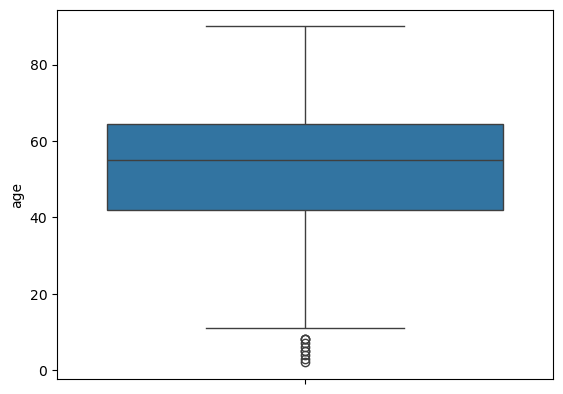

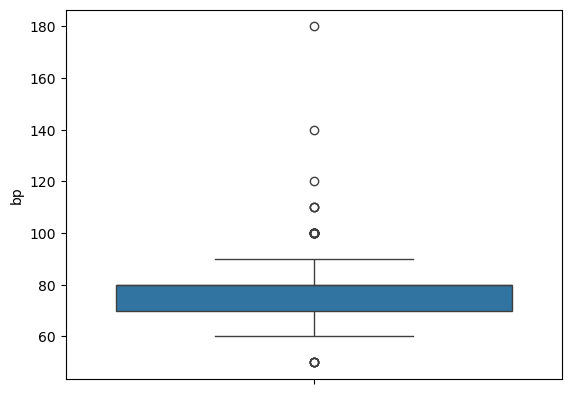

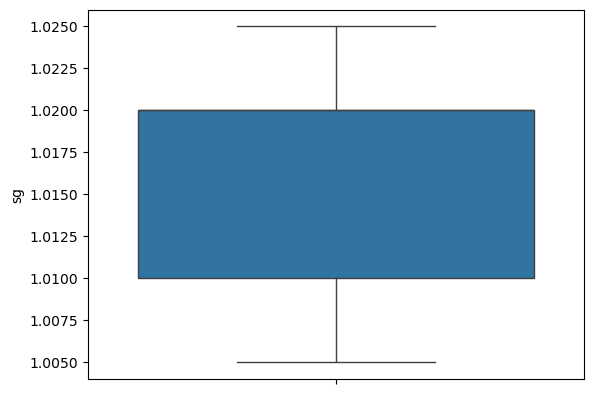

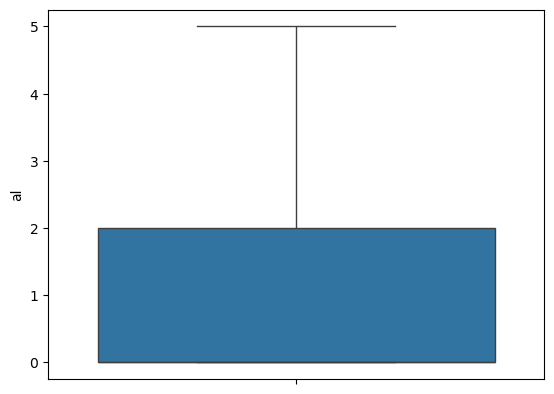

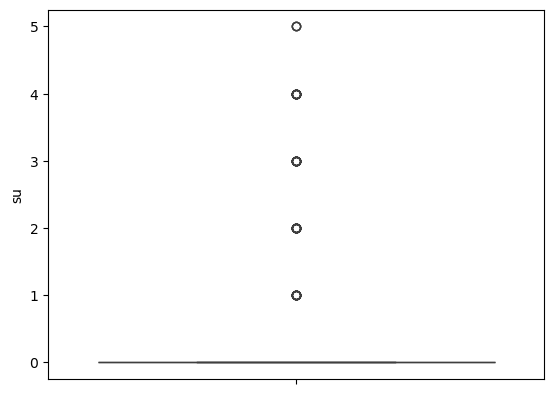

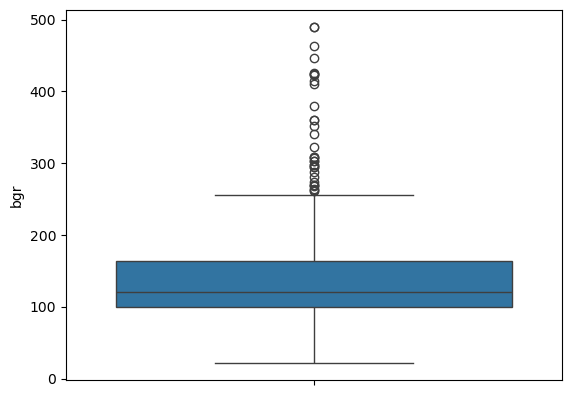

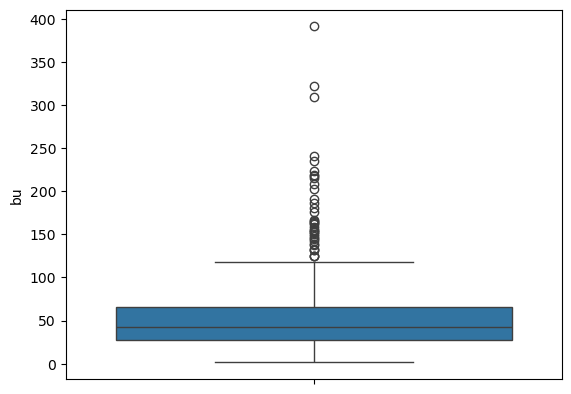

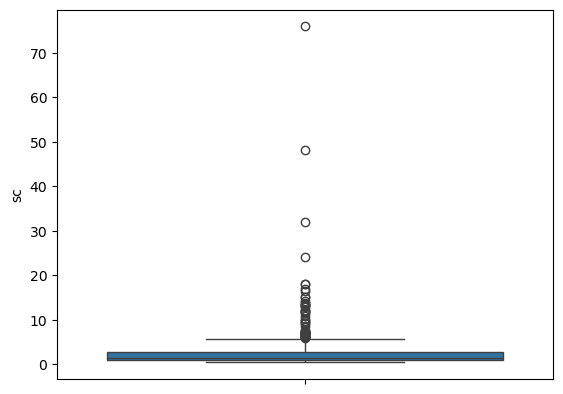

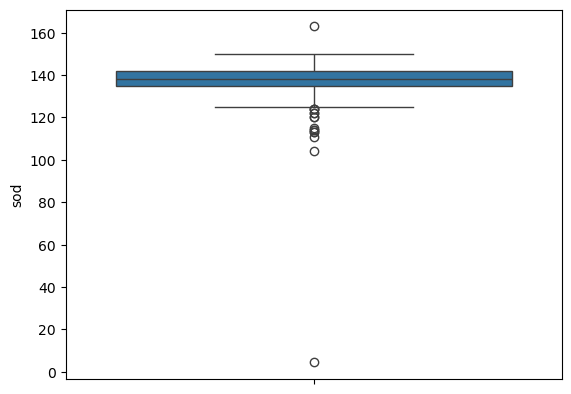

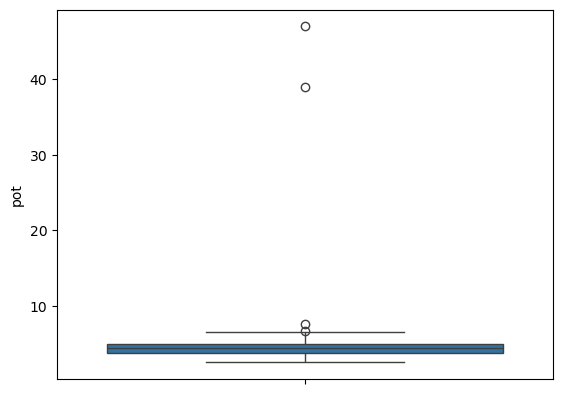

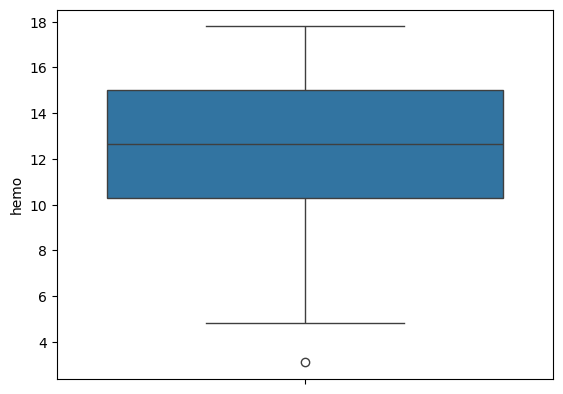

In [25]:
###Outlier detection and remove
def boxf(col):
    sns.boxplot(data[col])
    plt.show()

for i in list(data_imputer.select_dtypes(exclude=['object']).columns)[1:]:
    boxf(i)

In [26]:
data_imputer.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [27]:
###convert cat into numeric
from sklearn import preprocessing

In [28]:
encode = data_imputer.apply(preprocessing.LabelEncoder().fit_transform)

In [29]:
encode

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,34,1,1,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,34,0,0,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,34,0,1,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,19,1,0,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,27,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,59,30,0,0,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,69,44,0,0,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,58,36,0,0,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,64,41,0,0,0,0,0,0,1


In [30]:
encode.to_csv("Final_pre_processing_data.csv")

<Axes: >

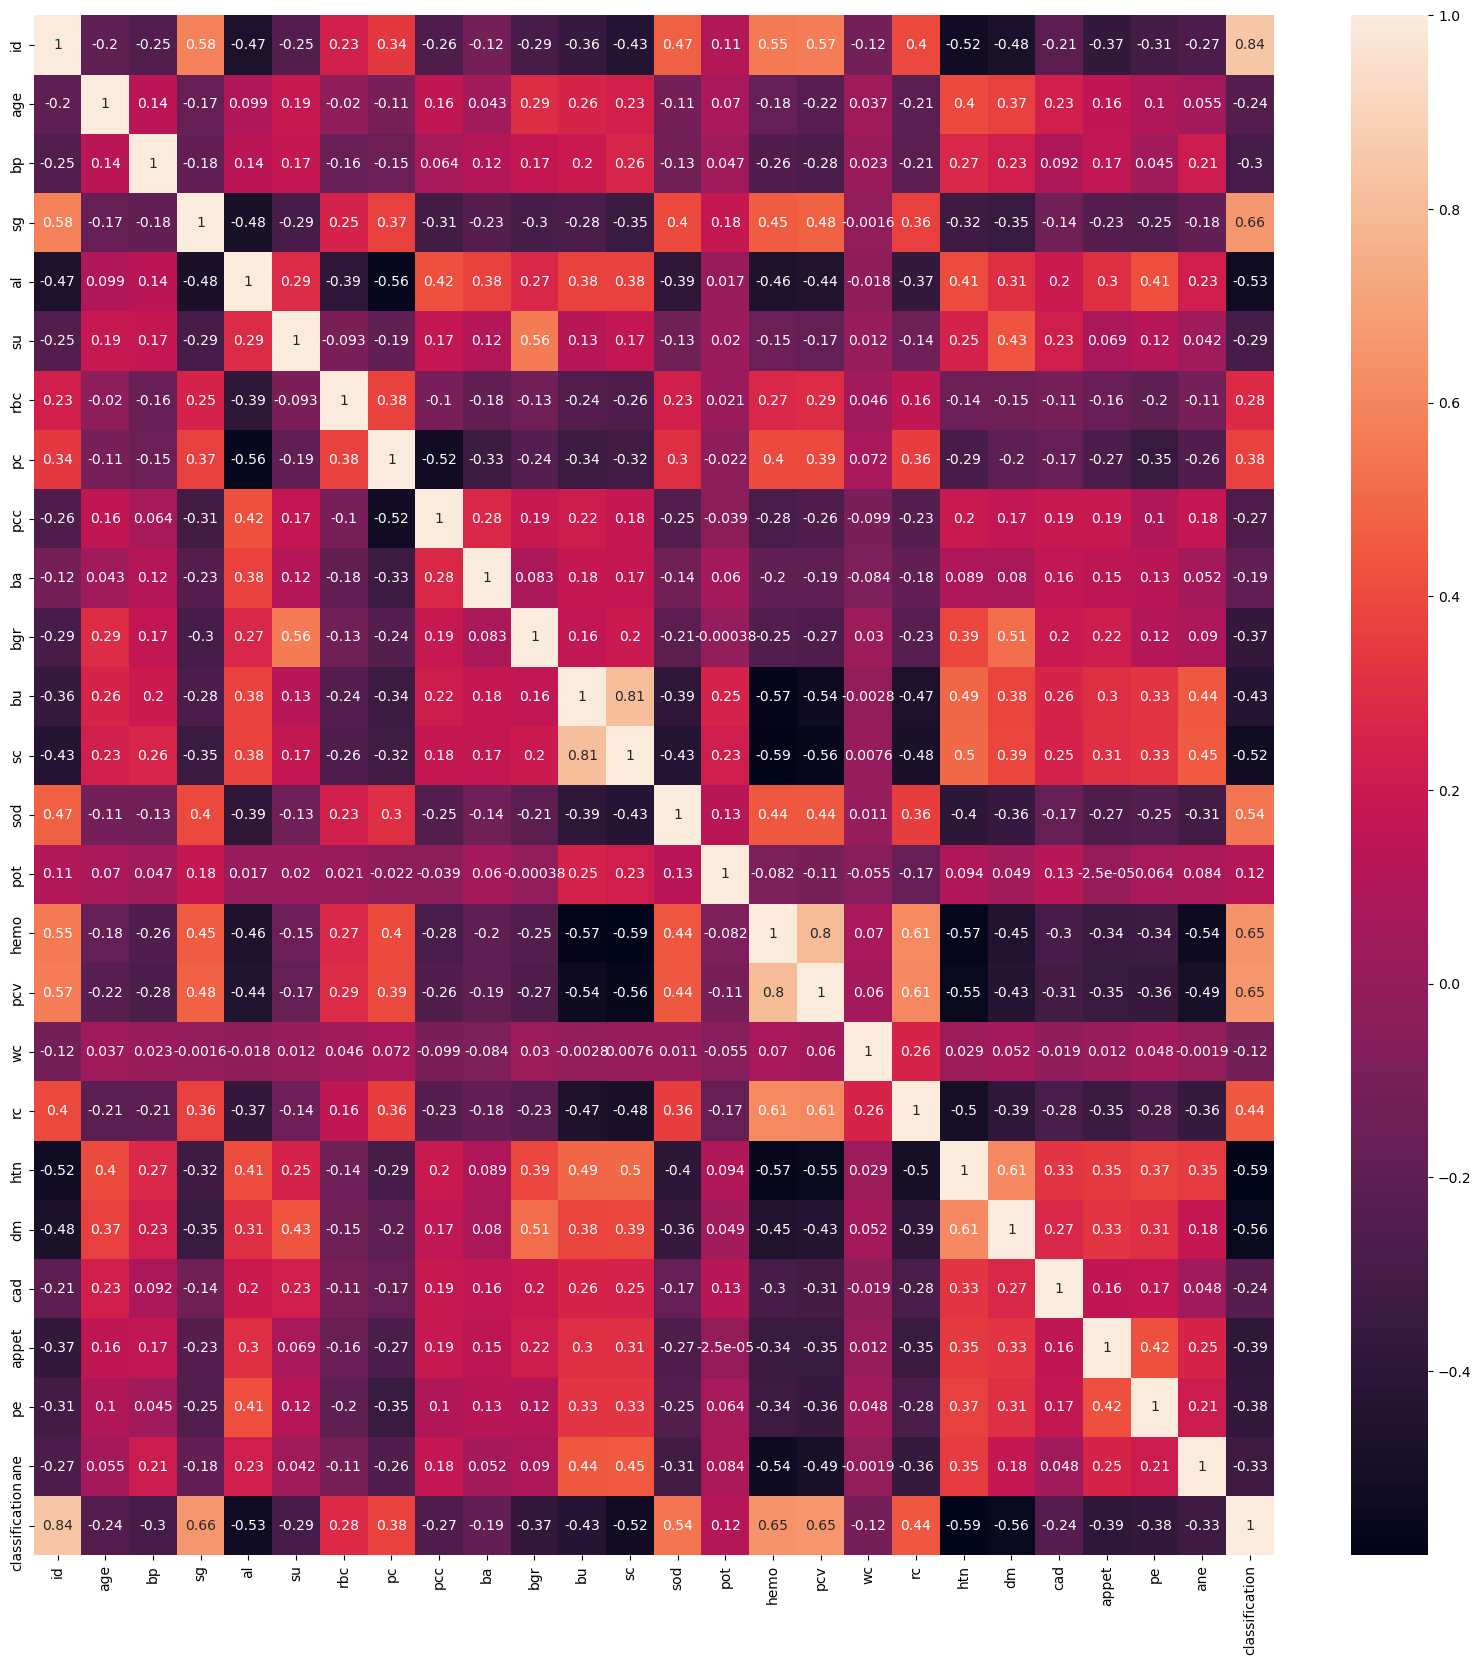

In [31]:
###Visualiging and analysing the correaltion between features in Final_Preprocessing_data
plt.figure(figsize=(20,20))
corr = encode.corr()
sns.heatmap(corr, annot=True)

In [32]:
encode.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [33]:
X = encode.drop(['id','classification'], axis=1)
y = encode['classification']

In [34]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,40,3,3,1,0,1,1,0,0,48,...,90,30,69,34,1,1,0,0,0,0
1,5,0,3,4,0,1,1,0,0,26,...,49,24,53,34,0,0,0,0,0,0
2,54,3,1,2,3,1,1,0,0,140,...,32,17,67,34,0,1,0,1,0,1
3,40,2,0,4,0,1,0,1,0,44,...,48,18,59,19,1,0,0,1,1,1
4,43,3,1,2,0,1,1,0,0,33,...,52,21,65,27,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,47,3,3,0,0,1,1,0,0,64,...,93,33,59,30,0,0,0,0,0,0
396,34,2,4,0,0,1,1,0,0,3,...,101,40,69,44,0,0,0,0,0,0
397,8,3,3,0,0,1,1,0,0,27,...,94,35,58,36,0,0,0,0,0,0
398,11,1,4,0,0,1,1,0,0,41,...,78,37,64,41,0,0,0,0,0,0


In [35]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int32

In [36]:
###Balancing the classification clolumn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [37]:
print(Counter(y))

Counter({0: 250, 1: 150})


In [38]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler((-1,1))
X = scaler.fit_transform(X_ros)
y = y_ros

In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: classification, Length: 500, dtype: int32

In [42]:
X

array([[ 0.06666667, -0.33333333,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.86666667, -1.        ,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.44      , -0.33333333, -0.5       , ...,  1.        ,
        -1.        ,  1.        ],
       ...,
       [ 0.12      , -0.33333333,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.52      , -0.33333333,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.38666667, -0.33333333,  0.5       , ..., -1.        ,
        -1.        , -1.        ]])

In [43]:
data.shape

(400, 26)

In [44]:
 ###reduceiing unncesary columns
from sklearn.decomposition import PCA

In [45]:
pca = PCA(.95)
X_PCA = pca.fit_transform(X)

In [46]:
print(X.shape)
print(X_PCA.shape)

(500, 24)
(500, 18)


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train,y_test = train_test_split(X_PCA, y, test_size=0.2,random_state=7)

In [49]:
X_train

array([[-1.34912446, -0.03558729,  0.08322579, ..., -0.17588706,
         0.3001435 , -0.0619781 ],
       [-1.32863008,  0.01914844, -0.05936567, ..., -0.09618837,
         0.23794594,  0.15550473],
       [ 0.04619281,  1.1548209 , -0.52284543, ..., -0.21025411,
        -0.6480368 ,  0.0554101 ],
       ...,
       [ 1.46073712,  1.42421241,  0.43967302, ...,  0.54342844,
        -0.2110067 ,  0.20029006],
       [ 4.48191137, -1.14163416,  1.29279904, ..., -0.46718442,
         0.0835766 ,  0.02133448],
       [ 0.4990351 ,  0.54768238, -0.46939403, ..., -0.79204683,
        -0.34471434, -0.25880185]])

In [50]:
y_train

342    1
359    1
109    0
50     0
452    1
      ..
211    0
67     0
25     0
196    0
175    0
Name: classification, Length: 400, dtype: int32

In [51]:
X_test

array([[-1.26924269, -0.06824663,  0.19267695, ...,  0.02699239,
        -0.06587419,  0.16150911],
       [ 2.42210515,  1.27705349,  1.50367737, ..., -0.51116644,
         0.12334905, -0.26686627],
       [-1.326116  , -0.11247788, -0.33820732, ...,  0.30343612,
         0.3639521 ,  0.04326932],
       ...,
       [ 1.87049908,  1.03772468, -1.91742412, ...,  0.03768066,
        -0.12618785,  0.59816374],
       [-1.29415705, -0.20524422,  0.11540711, ..., -0.09771044,
        -0.06623194, -0.03169059],
       [ 2.1821809 ,  1.48821102,  0.37343138, ..., -0.53903339,
        -0.19805728, -0.31343792]])

In [52]:
y_test

308    1
13     0
414    1
32     0
460    1
      ..
235    0
26     0
168    0
451    1
238    0
Name: classification, Length: 100, dtype: int32

-Building machine learning models

In [54]:
### 1 logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lgr = LogisticRegression()
lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)

lgr_acc = accuracy_score(y_test,y_pred)
lgr_cm = confusion_matrix(y_test,y_pred)
lgr_cr = classification_report(y_test,y_pred)

print("accuracy_score\n", lgr_acc )
print("confusion_matrix\n", lgr_cm)
print("classification_report\n", lgr_cr)

accuracy_score
 0.98
confusion_matrix
 [[46  2]
 [ 0 52]]
classification_report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.96      1.00      0.98        52

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [55]:
### 2 Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred =dtc.predict(X_test)

dtc_acc = accuracy_score(y_test,y_pred)
dtc_cm = confusion_matrix(y_test,y_pred)
dtc_cr = classification_report(y_test,y_pred)

print("accuracy_score\n", dtc_acc )
print("confusion_matrix\n", dtc_cm)
print("classification_report\n", dtc_cr)

accuracy_score
 1.0
confusion_matrix
 [[48  0]
 [ 0 52]]
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [56]:
### 3 Support Vector Machine

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc = SVC(kernel='linear', C=1E10)
svc.fit(X_train,y_train)
y_pred =svc.predict(X_test)

svc_acc = accuracy_score(y_test,y_pred)
svc_cm = confusion_matrix(y_test,y_pred)
svc_cr = classification_report(y_test,y_pred)

print("accuracy_score\n", svc_acc )
print("confusion_matrix\n", svc_cm)
print("classification_report\n", svc_cr)

accuracy_score
 0.97
confusion_matrix
 [[45  3]
 [ 0 52]]
classification_report
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.95      1.00      0.97        52

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [57]:
### 4 K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred =knn.predict(X_test)

knn_acc = accuracy_score(y_test,y_pred)
knn_cm = confusion_matrix(y_test,y_pred)
knn_cr = classification_report(y_test,y_pred)

print("accuracy_score\n", knn_acc )
print("confusion_matrix\n", knn_cm)
print("classification_report\n", knn_cr)

accuracy_score
 1.0
confusion_matrix
 [[48  0]
 [ 0 52]]
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [58]:
### 5 Ensemble Learning Models

#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rfc = RandomForestClassifier(criterion='entropy', max_depth=11, max_features=18, #max_features
                            min_samples_leaf=2, n_estimators=130)
rfc.fit(X_train,y_train)
y_pred =rfc.predict(X_test)

rfc_acc = accuracy_score(y_test,y_pred)
rfc_cm = confusion_matrix(y_test,y_pred)
rfc_cr = classification_report(y_test,y_pred)

print("accuracy_score\n", rfc_acc )
print("confusion_matrix\n", rfc_cm)
print("classification_report\n", rfc_cr)

accuracy_score
 1.0
confusion_matrix
 [[48  0]
 [ 0 52]]
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [59]:
###AdaBoostCLassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

adbc = AdaBoostClassifier()
adbc.fit(X_train,y_train)
y_pred =adbc.predict(X_test)

adbc_acc = accuracy_score(y_test,y_pred)
adbc_cm = confusion_matrix(y_test,y_pred)
adbc_cr = classification_report(y_test,y_pred)

print("accuracy_score\n", adbc_acc )
print("confusion_matrix\n", adbc_cm)
print("classification_report\n", adbc_cr)

accuracy_score
 1.0
confusion_matrix
 [[48  0]
 [ 0 52]]
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [60]:
###Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred =gbc.predict(X_test)

gbc_acc = accuracy_score(y_test,y_pred)
gbc_cm = confusion_matrix(y_test,y_pred)
gbc_cr = classification_report(y_test,y_pred)

print("accuracy_score\n", gbc_acc )
print("confusion_matrix\n", gbc_cm)
print("classification_report\n", gbc_cr)

accuracy_score
 1.0
confusion_matrix
 [[48  0]
 [ 0 52]]
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [61]:
###Stochastic Gradient Boosting (SGB)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgc = GradientBoostingClassifier(max_depth=4, subsample=0.90, max_features=0.75, n_estimators=200)
sgc.fit(X_train,y_train)
y_pred =sgc.predict(X_test)

sgc_acc = accuracy_score(y_test,y_pred)
sgc_cm = confusion_matrix(y_test,y_pred)
sgc_cr = classification_report(y_test,y_pred)

print("accuracy_score\n", sgc_acc )
print("confusion_matrix\n", sgc_cm)
print("classification_report\n", sgc_cr)

accuracy_score
 1.0
confusion_matrix
 [[48  0]
 [ 0 52]]
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [62]:
### XG Boost Classifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred =xgb.predict(X_test)

xgb_acc = accuracy_score(y_test,y_pred)
xgb_cm = confusion_matrix(y_test,y_pred)
xgb_cr = classification_report(y_test,y_pred)

print("accuracy_score\n", xgb_acc )
print("confusion_matrix\n", xgb_cm)
print("classification_report\n", xgb_cr)

accuracy_score
 1.0
confusion_matrix
 [[48  0]
 [ 0 52]]
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [63]:
###Cat Boost Classifier

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train,y_train)
y_pred =cat.predict(X_test)

cat_acc = accuracy_score(y_test,y_pred)
cat_cm = confusion_matrix(y_test,y_pred)
cat_cr = classification_report(y_test,y_pred)

print("accuracy_score\n", cat_acc )
print("confusion_matrix\n", cat_cm)
print("classification_report\n", cat_cr)

Learning rate set to 0.47535
0:	learn: 0.4460060	total: 203ms	remaining: 1.83s
1:	learn: 0.3194013	total: 235ms	remaining: 942ms
2:	learn: 0.2377716	total: 299ms	remaining: 697ms
3:	learn: 0.1788638	total: 333ms	remaining: 500ms
4:	learn: 0.1409098	total: 347ms	remaining: 347ms
5:	learn: 0.1213071	total: 358ms	remaining: 239ms
6:	learn: 0.1005941	total: 372ms	remaining: 159ms
7:	learn: 0.0815839	total: 381ms	remaining: 95.2ms
8:	learn: 0.0693313	total: 396ms	remaining: 44ms
9:	learn: 0.0555521	total: 406ms	remaining: 0us
accuracy_score
 1.0
confusion_matrix
 [[48  0]
 [ 0 52]]
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [64]:
### Extra Tree Classifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

etc = CatBoostClassifier(iterations=10)
etc.fit(X_train,y_train)
y_pred =etc.predict(X_test)

etc_acc = accuracy_score(y_test,y_pred)
etc_cm = confusion_matrix(y_test,y_pred)
etc_cr = classification_report(y_test,y_pred)

print("accuracy_score\n", etc_acc )
print("confusion_matrix\n", etc_cm)
print("classification_report\n", etc_cr)

Learning rate set to 0.47535
0:	learn: 0.4460060	total: 7.6ms	remaining: 68.4ms
1:	learn: 0.3194013	total: 14.7ms	remaining: 58.9ms
2:	learn: 0.2377716	total: 20.7ms	remaining: 48.2ms
3:	learn: 0.1788638	total: 27ms	remaining: 40.4ms
4:	learn: 0.1409098	total: 34ms	remaining: 34ms
5:	learn: 0.1213071	total: 40ms	remaining: 26.6ms
6:	learn: 0.1005941	total: 45.8ms	remaining: 19.6ms
7:	learn: 0.0815839	total: 52ms	remaining: 13ms
8:	learn: 0.0693313	total: 57.9ms	remaining: 6.43ms
9:	learn: 0.0555521	total: 63.6ms	remaining: 0us
accuracy_score
 1.0
confusion_matrix
 [[48  0]
 [ 0 52]]
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [65]:
### 6 ANN
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [66]:
def model():
    clf=Sequential()
    clf.add(Dense(15, input_shape=(X_train.shape[1],), activation='relu'))
    clf.add(Dropout(0.2))
    clf.add(Dense(15,activation='relu'))
    clf.add(Dropout(0.4))
    clf.add(Dense(1, activation='sigmoid'))
    clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return clf

In [67]:
model = model()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=20, verbose=1)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.5492 - loss: 0.8378 - val_accuracy: 0.6700 - val_loss: 0.6653
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5803 - loss: 0.7775 - val_accuracy: 0.8200 - val_loss: 0.5903
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6944 - loss: 0.6218 - val_accuracy: 0.8700 - val_loss: 0.5265
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7160 - loss: 0.5880 - val_accuracy: 0.9300 - val_loss: 0.4715
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7858 - loss: 0.5170 - val_accuracy: 0.9400 - val_loss: 0.4217
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8115 - loss: 0.4832 - val_accuracy: 0.9700 - val_loss: 0.3786
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8525 - loss: 0.4304 - val_accuracy: 0.9800 - val_loss: 0.3378
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8811 - loss: 0.4070 - val_accuracy: 0.9900 - v

In [70]:
y_prob = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [71]:
y_pred = y_prob.argmax(axis=1)

In [72]:
ann_acc = accuracy_score(y_test,y_pred)
ann_acc

0.48

Model Comprarison

In [74]:
models_acc = pd.DataFrame({'Model' : ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN','Random Forest Classifier','Ada Boost CLassifier', 'Gradient Boosting Classifier','Stochastic Gradient Boosting', 'XGBoost','Cat Boost','Extra Trees CLassifier'],
                       'Score' : [lgr_acc,dtc_acc,svc_acc,knn_acc,rfc_acc,adbc_acc,gbc_acc,sgc_acc,xgb_acc,cat_acc,etc_acc]})
models_acc.sort_values(by='Score')

,Model,Score
2,SVM,0.97
0,Logistic Regression,0.98
1,Decision Tree,1.00
3,KNN,1.00
4,Random Forest Classifier,1.00
5,Ada Boost CLassifier,1.00
6,Gradient Boosting Classifier,1.00
7,Stochastic Gradient Boosting,1.00
8,XGBoost,1.00
9,Cat Boost,1.00


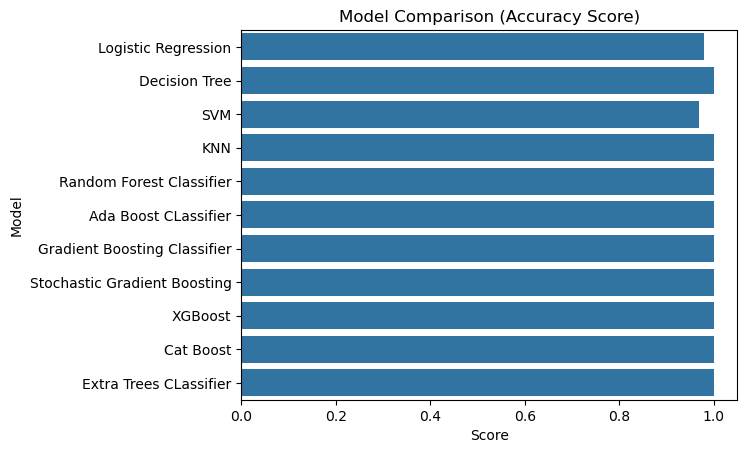

In [75]:
###Use barplot to compare the results of each model

sns.barplot(data=models_acc, x="Score",y="Model")
plt.title("Model Comparison (Accuracy Score)") 
plt.show()

In [76]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
import pickle

In [78]:
with open("ckd_model.pkl", "wb") as file:
    pickle.dump(model,file)

In [79]:
with open ("ckd_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

prediction = loaded_model.predict(X_test[:5])
print("Sample Predictions:", prediction)

Sample Predictions: [1 0 1 0 1]
